In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import xifs.xifs as xifs
import cartopy.crs as ccrs
import math

## globally averages variables and seasmean

In [2]:
file1='../ECE3_1m*.nc'

In [3]:
analysis_list=["seasmean_2t","seasmean_sp","glomean_crf","glomean_es",'glomean_tclw','glomean_tciw','glomean_sp','glomean_tcwv','glomean_lsp','glomean_cp','glomean_sf','glomean_sshf','glomean_slhf','glomean_msl','glomean_2t','glomean_2d','glomean_ssrd','glomean_strd','glomean_ssr','glomean_str','glomean_tsr','glomean_ttr','glomean_e','glomean_tsrc','glomean_ttrc','glomean_ssrc','glomean_strc','glomean_tisr','glomean_tp','glomean_skt']

In [4]:
result=xifs.analysis(analysis_list,file1)

In [50]:
list_2D=analysis_list[2:]
seasons=['DJF', 'MAM', 'JJA', 'SON']

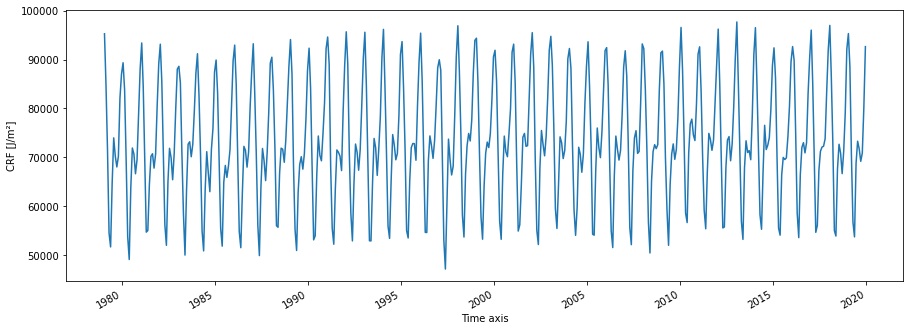

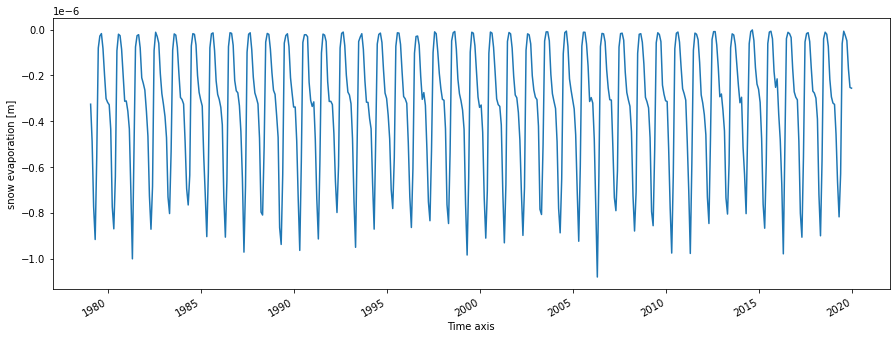

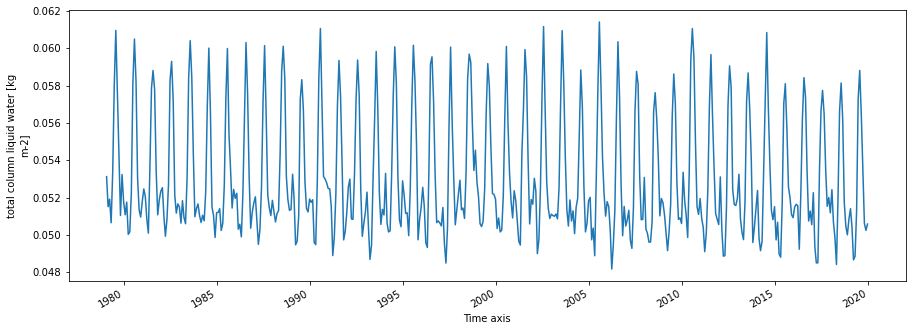

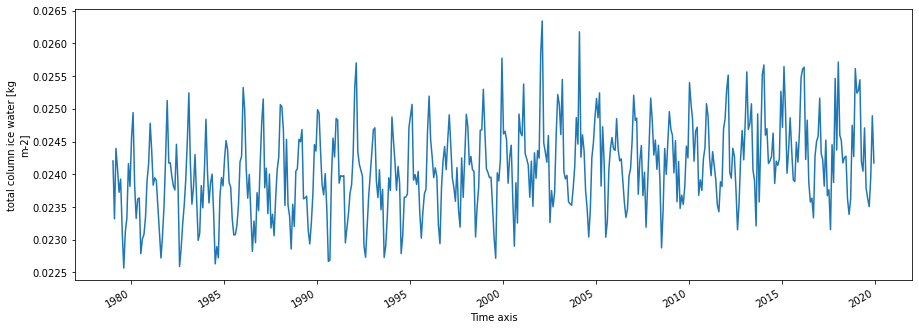

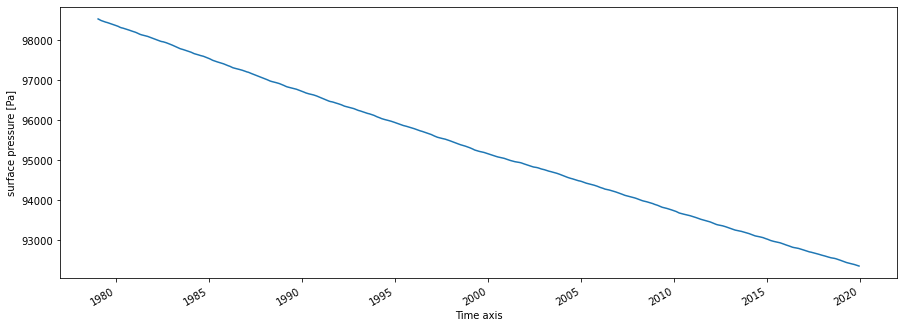

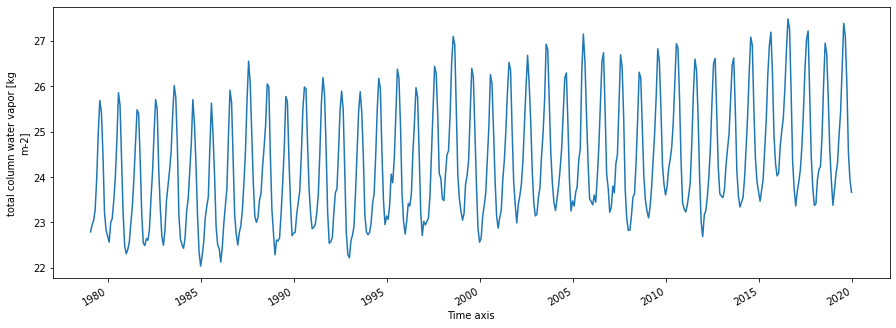

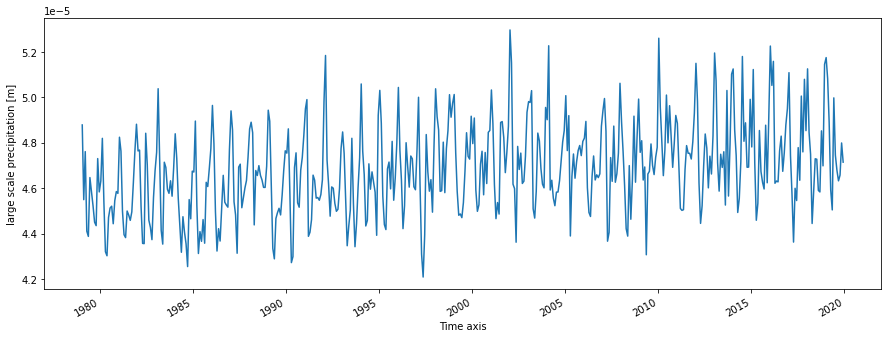

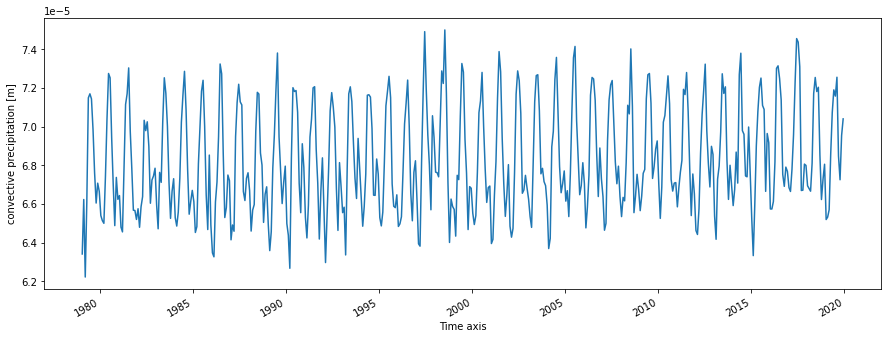

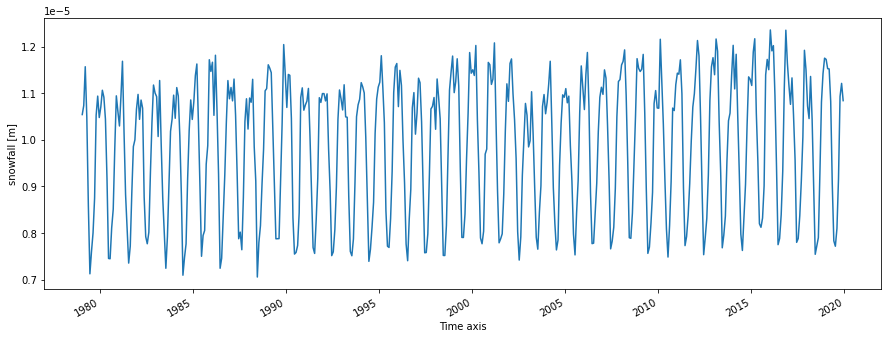

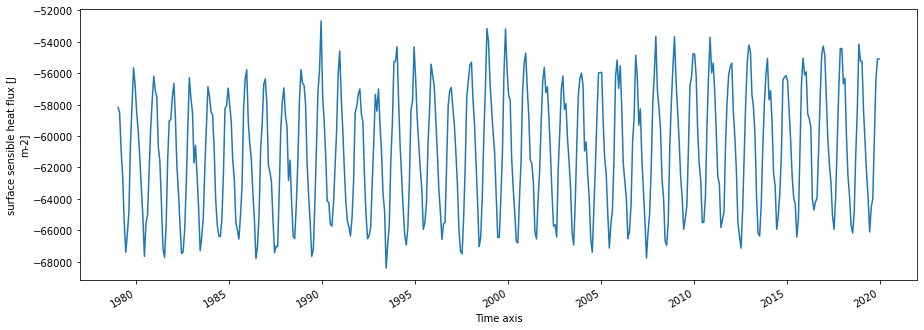

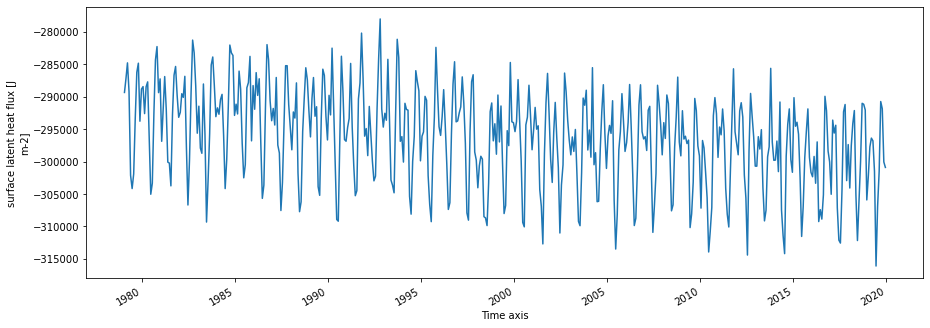

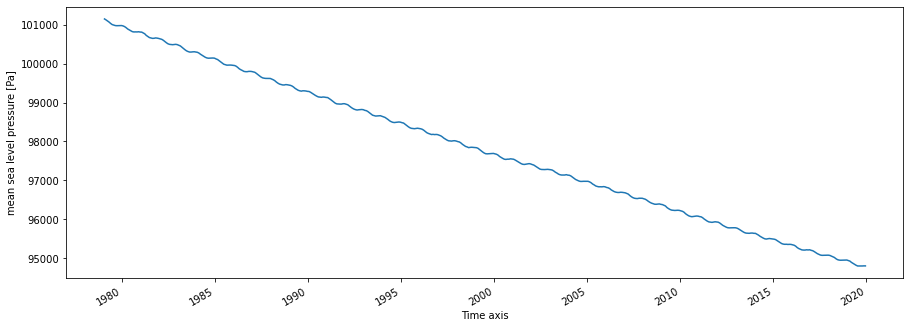

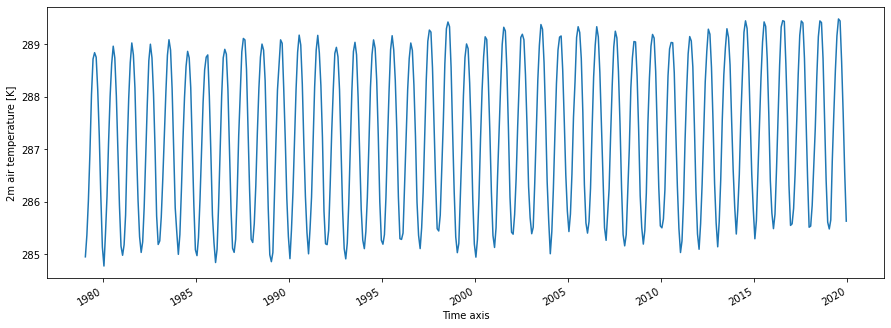

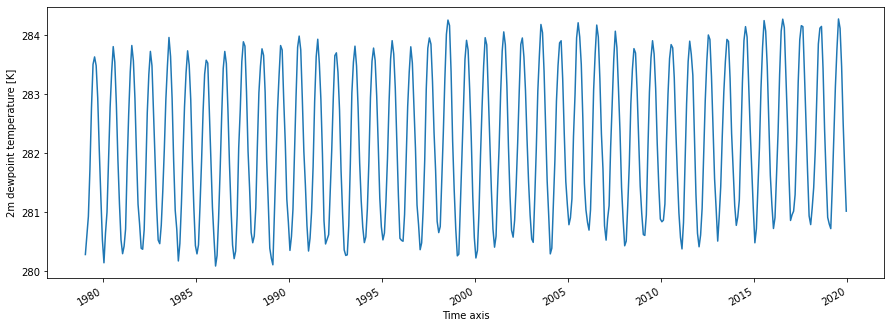

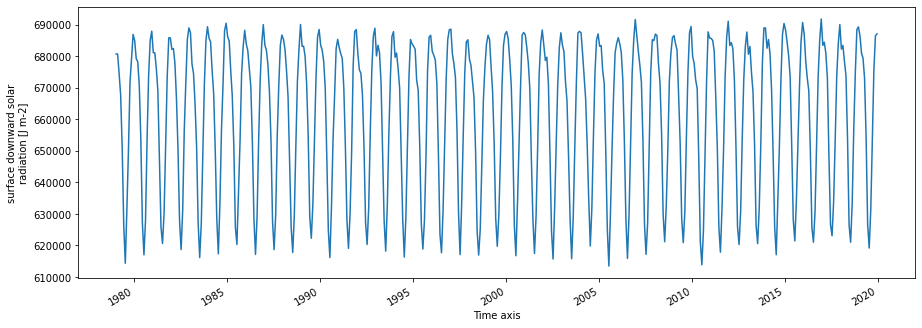

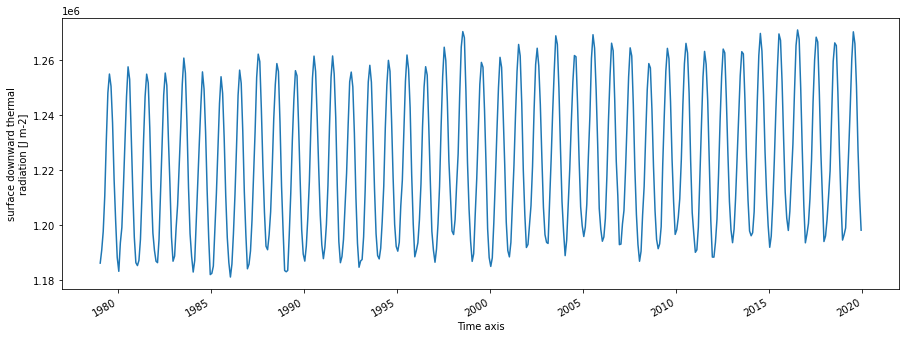

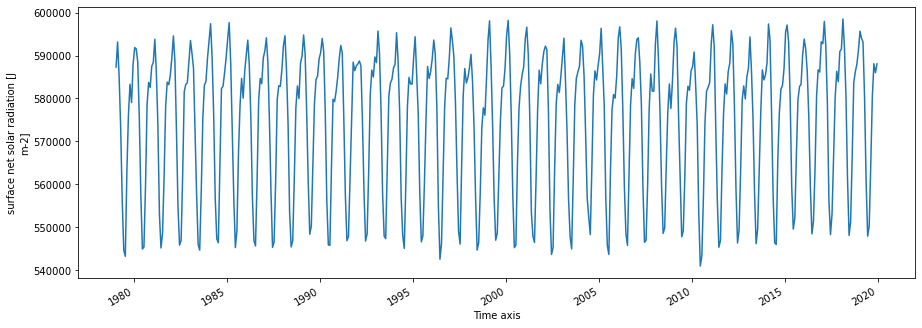

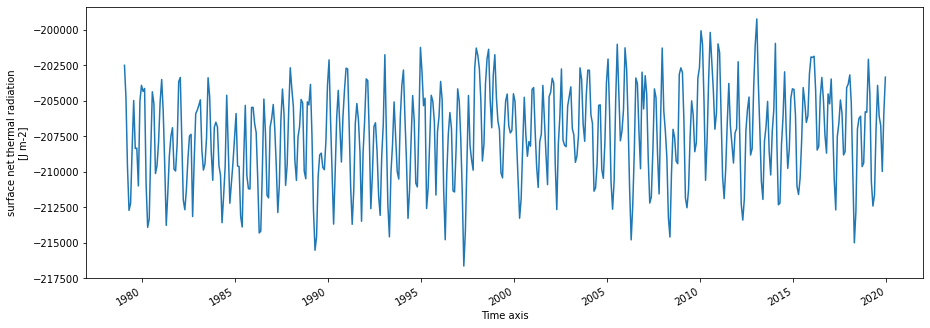

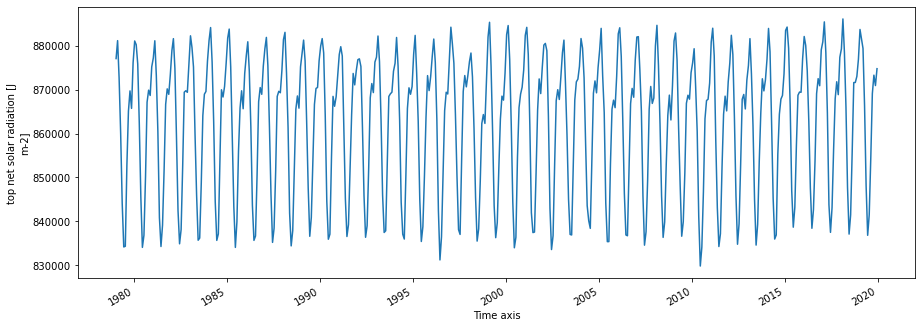

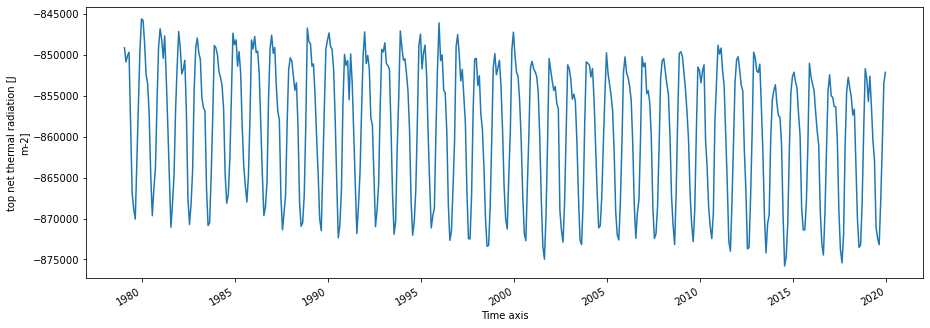

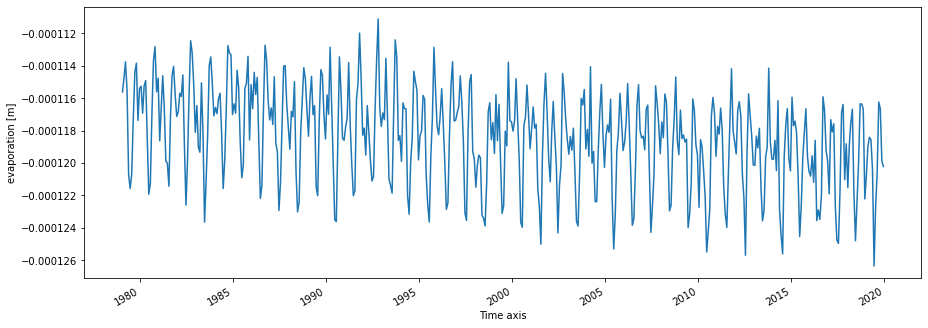

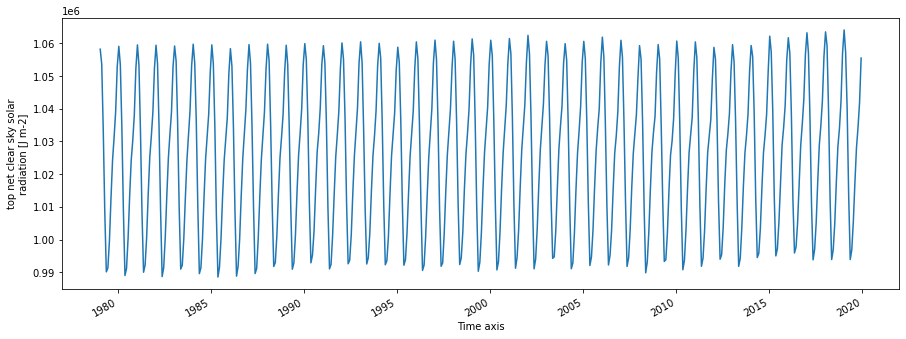

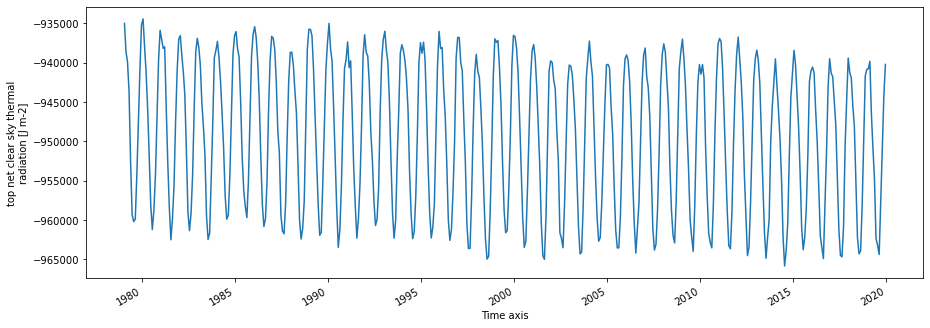

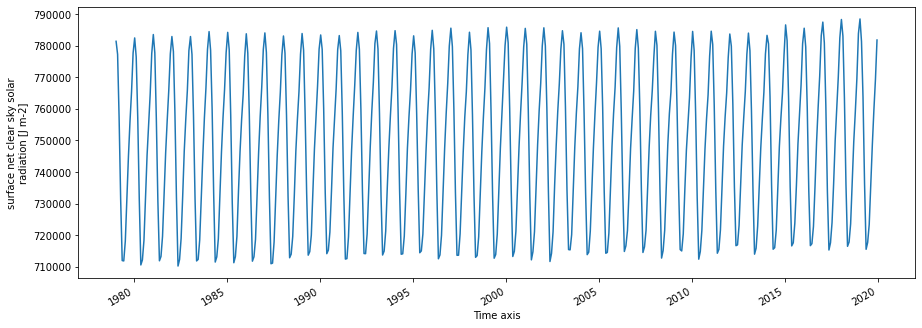

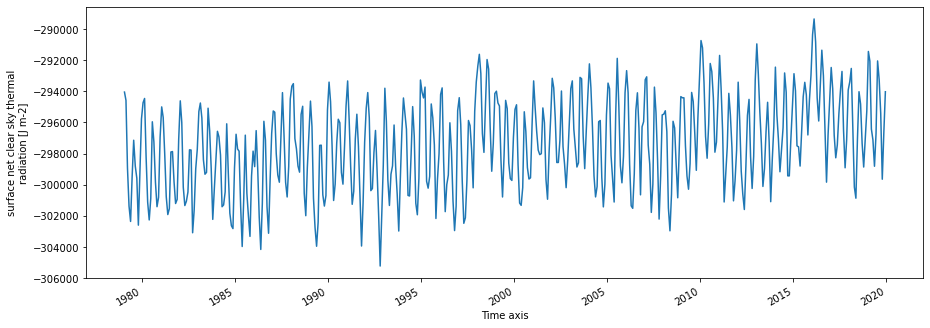

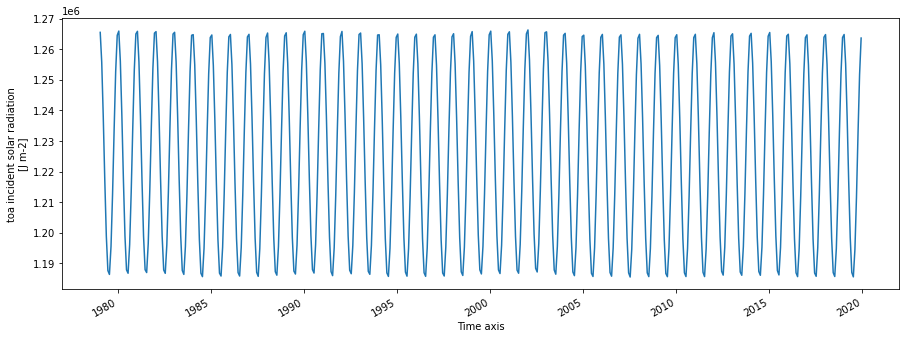

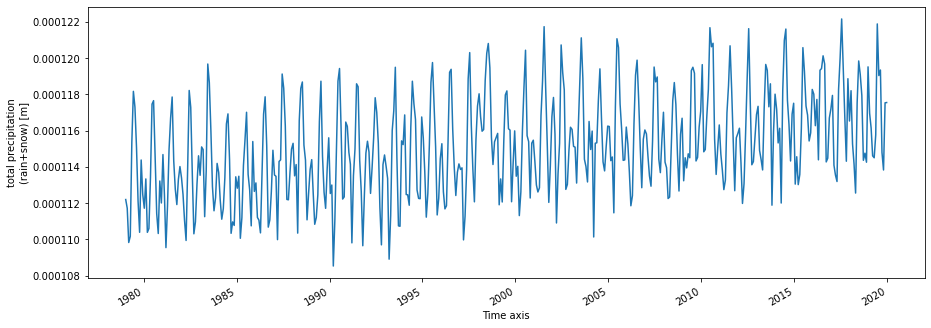

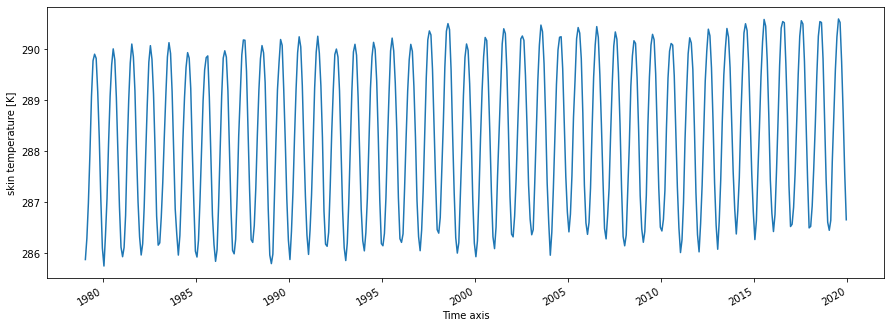

In [51]:
for l in list_2D:
    plt.figure(figsize=(15,5))
    result[l].plot();

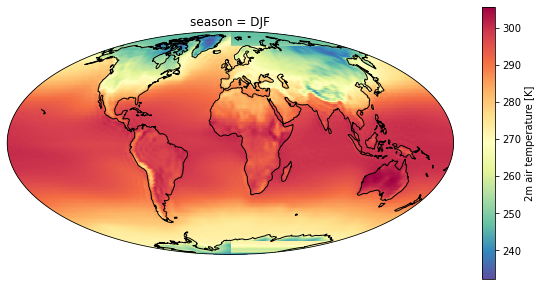

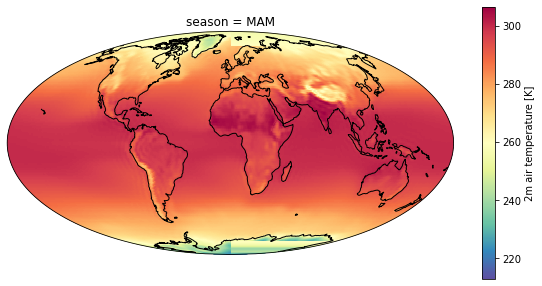

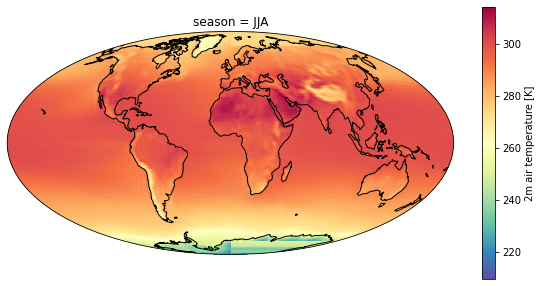

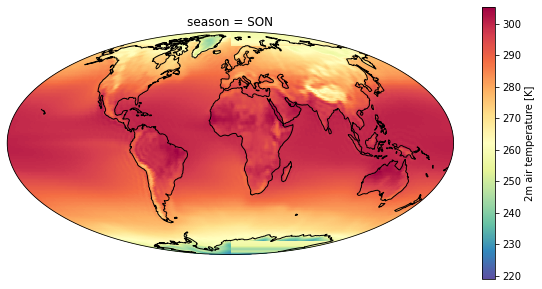

In [52]:
for s in seasons:
    plt.figure(figsize=(10,5))
    p=result['seasmean_2t'].sel(season=s).plot(cmap='Spectral_r',
        subplot_kws=dict(projection=ccrs.Mollweide(0), facecolor="gray"),
        transform=ccrs.PlateCarree(),)
    p.axes.coastlines()

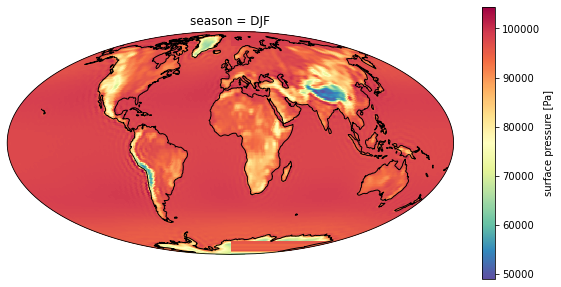

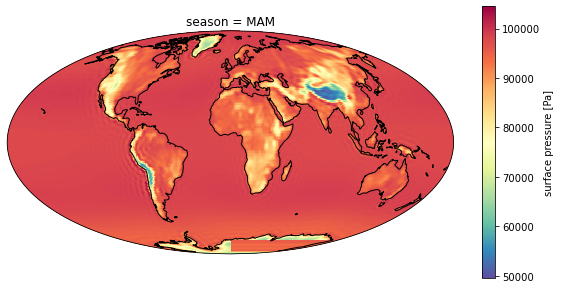

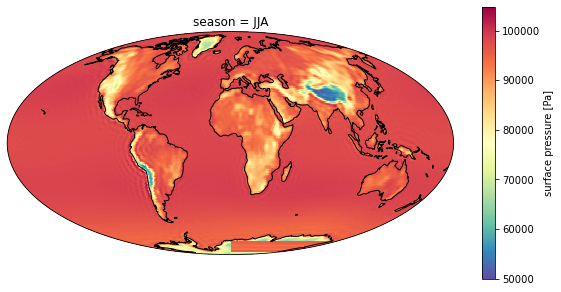

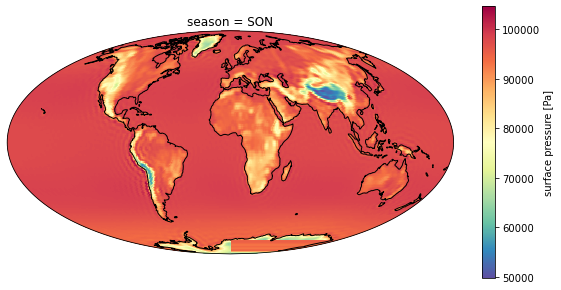

In [53]:
for s in seasons:
    plt.figure(figsize=(10,5))
    p=result['seasmean_sp'].sel(season=s).plot(cmap='Spectral_r',
        subplot_kws=dict(projection=ccrs.Mollweide(0), facecolor="gray"),
        transform=ccrs.PlateCarree(),)
    p.axes.coastlines()

In [5]:
xifs.to_netcdf(result,'output/output_test.nc')

## wind files

In [2]:
path='/data/user/jkjellsson/esm-experiments/focioifs/focioifs-merge14/outdata/oifs/'
file='ECE3_1m_1850*.nc'
filename=path+file

In [3]:
wind=['polar_vortex', 'QBO']

In [4]:
wind_result=xifs.analysis(wind, filename)

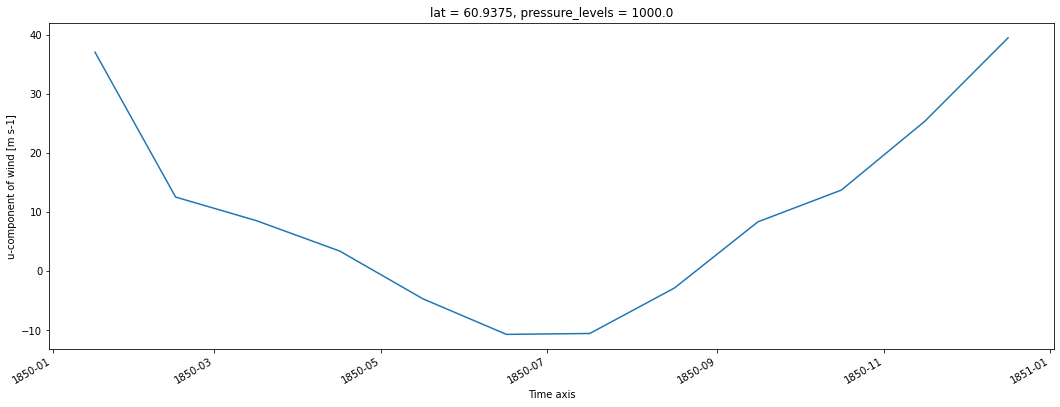

In [5]:
wind_result['polar_vortex'].plot(aspect=3,size=6);

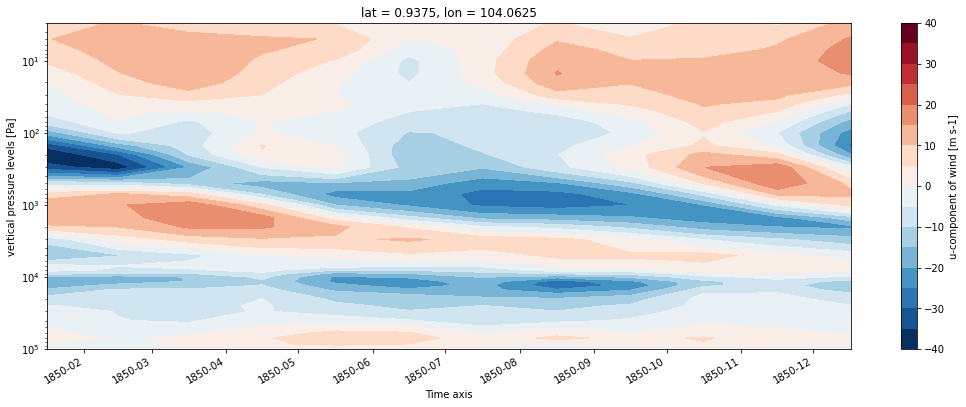

In [6]:
wind_result['QBO'].plot.contourf(y='pressure_levels', yscale='log', yincrease=False, levels=20,aspect=3,size=6);

In [ ]:
xifs.to_netcdf(wind_result, 'output/output_windtest.nc')

# finding SSW events, jet position and value

In [3]:
new_file='/data/proj/foci/openifs-43r3/OIFS-BJK004/outdata/oifs/agg/ECE3_1d_19790101-19831231_regular_pl.nc'

In [4]:
SSW=['polar_vortex','SSW']
jets=['jet']

In [5]:
res=xifs.analysis(SSW,new_file)
res_jet=xifs.analysis(jets, filename)

In [6]:
seasonal_data = res['polar_vortex'].where(res['polar_vortex'].time_counter.dt.month.isin([1,2,3,4,10,11,12]))

In [7]:
ssw = res['polar_vortex'].where(res['polar_vortex'].time_counter.isin(res['SSW']), drop=True)

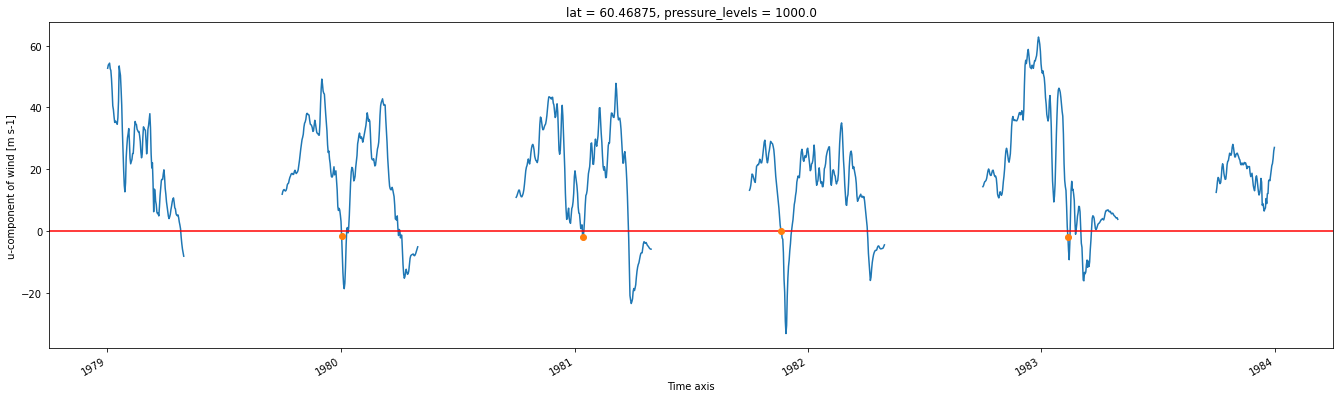

In [8]:
plt.figure(figsize=(23,6))
seasonal_data.plot()
plt.axhline(y=0, c='r')
ssw.plot.line(marker='o',linewidth=0.);

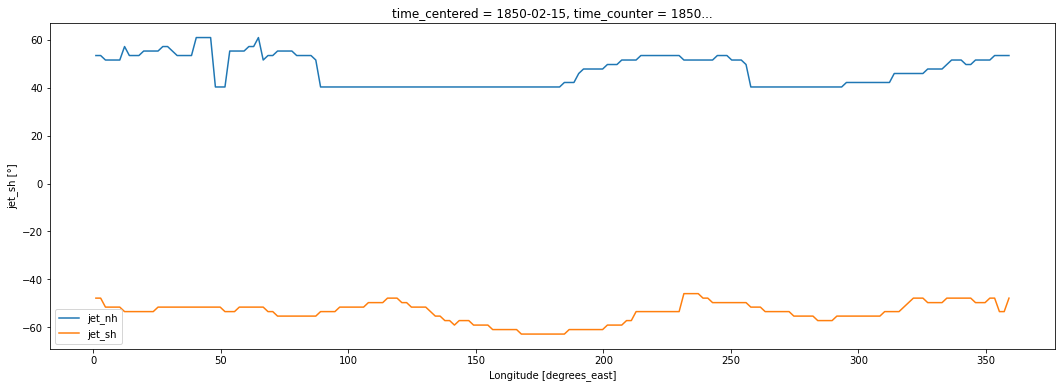

In [211]:
res_jet['jet_nh_pos'].isel(time_counter=1).plot(label='jet_nh',aspect=3,size=6)
res_jet['jet_sh_pos'].isel(time_counter=1).plot(label='jet_sh')
plt.legend();

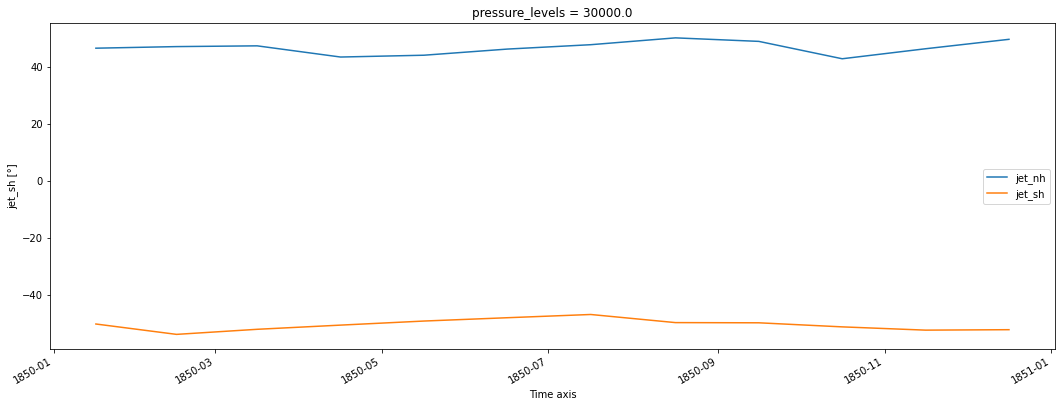

In [215]:
res_jet['jet_nh_pos'].mean('lon', keep_attrs=True).plot(label='jet_nh',aspect=3,size=6)
res_jet['jet_sh_pos'].mean('lon', keep_attrs=True).plot(label='jet_sh')
plt.legend();

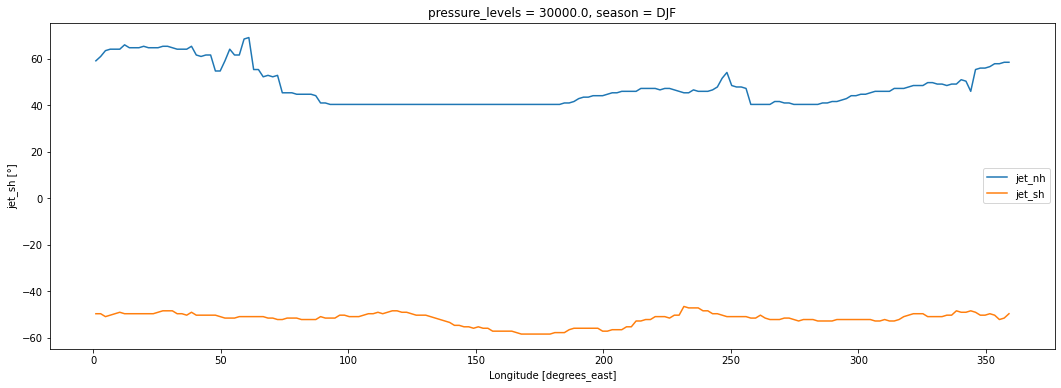

In [217]:
res_jet['jet_nh_pos'].groupby('time_counter.season').mean('time_counter', keep_attrs=True).sel(season='DJF').plot(label='jet_nh',aspect=3,size=6)
res_jet['jet_sh_pos'].groupby('time_counter.season').mean('time_counter', keep_attrs=True).sel(season='DJF').plot(label='jet_sh')
plt.legend();

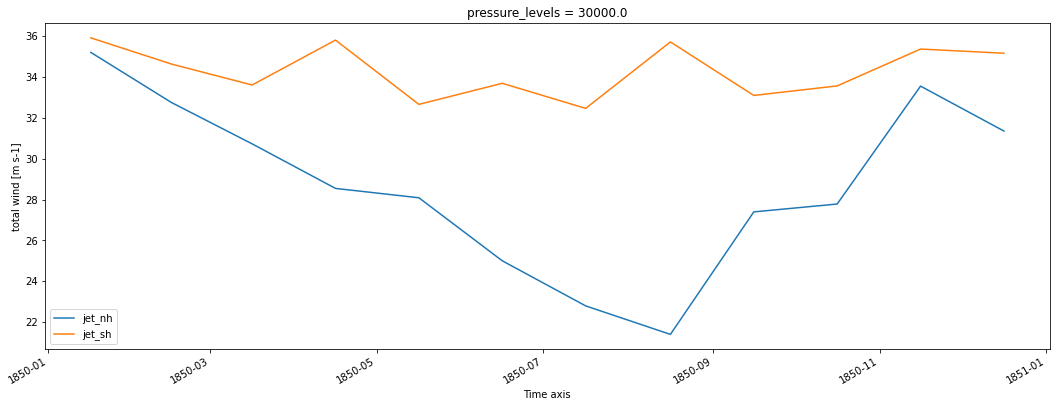

In [218]:
res_jet['jet_nh_value'].mean('lon', keep_attrs=True).plot(label='jet_nh',aspect=3,size=6)
res_jet['jet_sh_value'].mean('lon', keep_attrs=True).plot(label='jet_sh')
plt.legend();

In [12]:
xifs.to_netcdf(res_jet, 'output/output_jets.nc')
xifs.to_netcdf(res, 'output/output_SSW.nc')

In [ ]:
from dask.distributed import Client, LocalCluster, wait#
cluster=LocalCluster(n_workers=4, threads_per_worker=2, memory_limit=128e9,silence_logs=50)
client=Client(address=cluster)
client

# mass weighted jet position and strength

In [10]:
mw_analysis=['mw_jet']

In [11]:
mw_results=xifs.analysis(mw_analysis,filename)

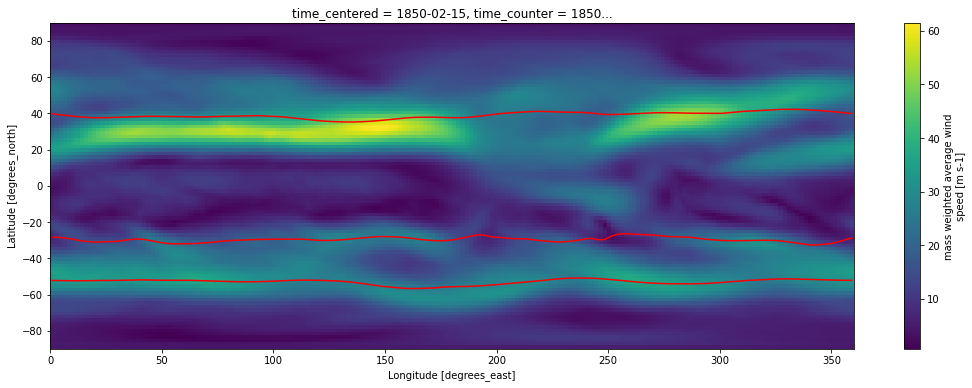

In [12]:
mw_results['mwu'].isel(time_counter=1).plot(aspect=3,size=6)
mw_results['mw_jet_nh'].isel(time_counter=1).plot(color='r')
mw_results['mw_jet_sht'].isel(time_counter=1).plot(color='r')
mw_results['mw_jet_shp'].isel(time_counter=1).plot(color='r');

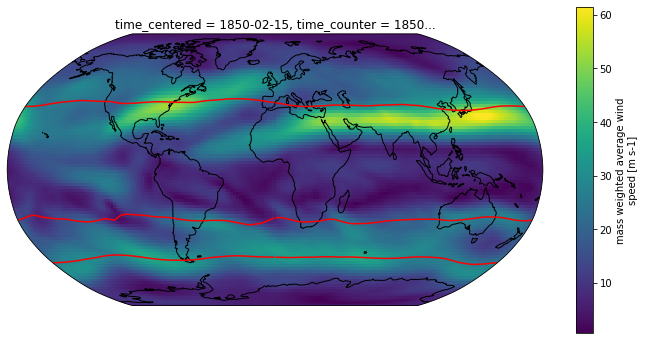

In [32]:
#as map
map_proj = ccrs.Robinson(central_longitude=0)
plt.figure(figsize=(12,6))
p = mw_results['mwu'].isel(time_counter=1).plot(transform=ccrs.PlateCarree(),  # the data's projection
             subplot_kws={'projection': map_proj}) 
mw_results['mw_jet_nh'].isel(time_counter=1).plot(color='r',transform=ccrs.PlateCarree())
mw_results['mw_jet_sht'].isel(time_counter=1).plot(color='r',transform=ccrs.PlateCarree())
mw_results['mw_jet_shp'].isel(time_counter=1).plot(color='r',transform=ccrs.PlateCarree())
p.axes.coastlines();

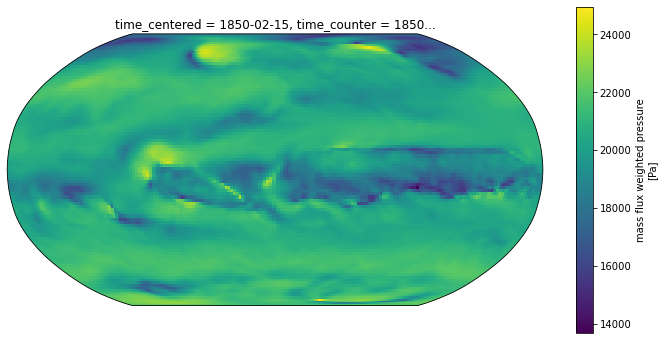

In [31]:
map_proj = ccrs.Robinson(central_longitude=0)
plt.figure(figsize=(12,6))
p = mw_results['mwp'].isel(time_counter=1).plot(transform=ccrs.PlateCarree(),  # the data's projection
             subplot_kws={'projection': map_proj}) 

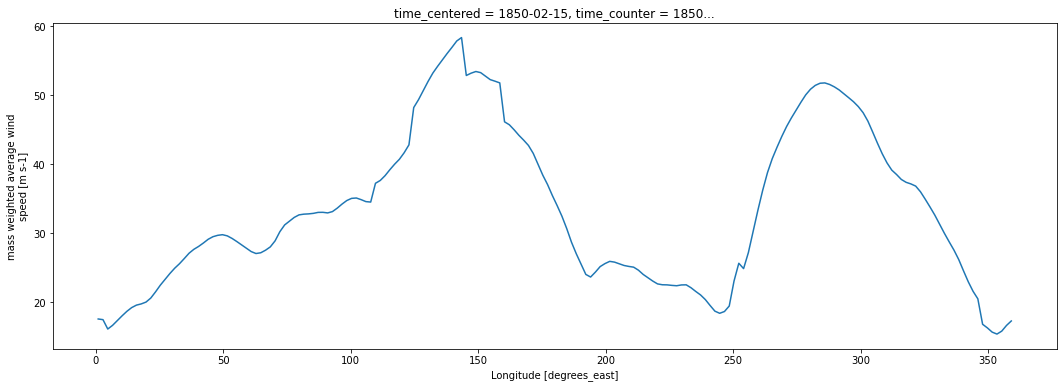

In [224]:
mw_results['ws_jet_nh'].isel(time_counter=1).plot(aspect=3,size=6);

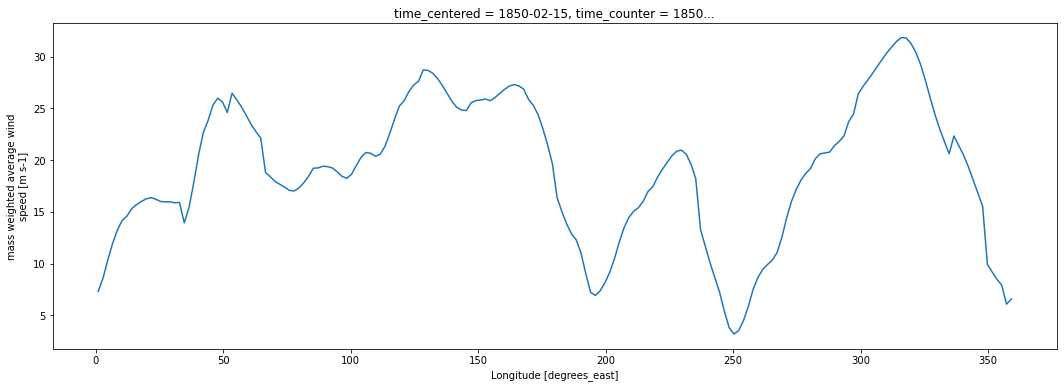

In [225]:
mw_results['ws_jet_sht'].isel(time_counter=1).plot(aspect=3,size=6);

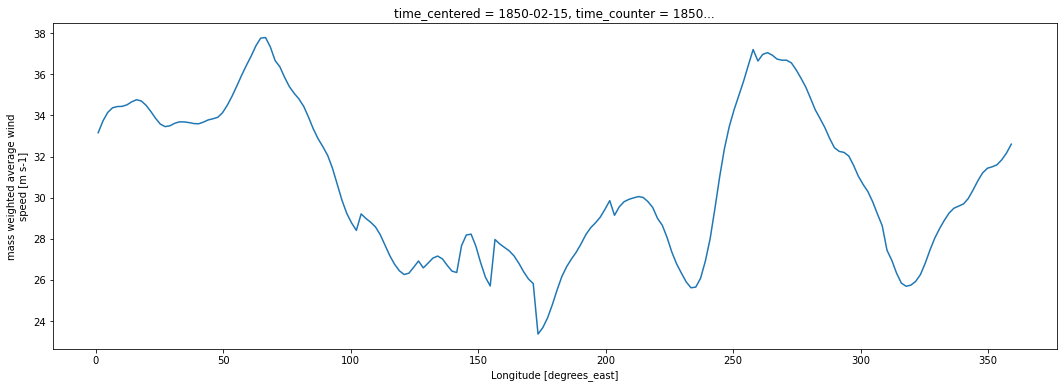

In [226]:
mw_results['ws_jet_shp'].isel(time_counter=1).plot(aspect=3,size=6);

In [11]:
xifs.to_netcdf(mw_results, '../output/output_mw_jet.nc')